winery                object
wine                  object
year                  object
rating               float64
number of reviews      int64
region                object
price                float64
type of wine          object
body                 float64
acidity              float64
dtype: object
Training Output Values: 
 4810     22.99
2470     16.76
13      925.00
3167     48.96
3908     37.90
         ...  
1245     49.90
2983     37.90
4350     17.50
7058     13.58
3053     28.30
Name: price, Length: 4552, dtype: float64
Testing Output Values: 
 4203    28.30
4318    61.94
6655    45.00
2745    16.76
2100    17.50
        ...  
5353    28.30
2617    48.96
3585    22.99
2465    28.53
6583    13.58
Name: price, Length: 1518, dtype: float64
Predicted price of wine from 1940 is: [701.02133006]
Predicted price of wine from 1975 is: [396.94215196]
Predicted price of wine from 1995 is: [223.18262162]
Predicted price of wine from 2012 is: [75.48702083]


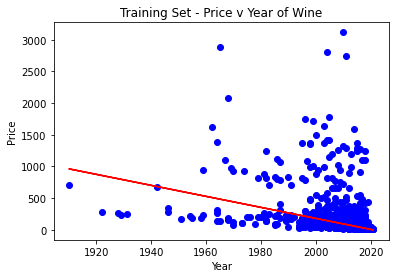

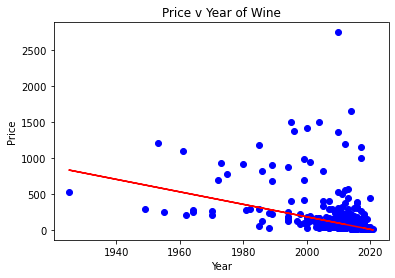

Mean Squared Error is: 20998.836534419697
R2 Score is: 0.1787948683205215


In [2]:
# Spanish Wines Quality/Price Dataset

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("wines_SPA.csv")

                                            #Data Wrangling                           
df=df1.dropna()
df=df1.dropna(axis=0).drop("country",axis=1)
df=df[(df.year != "N.V.") & (df.price != "N.V.")]
df.rename(columns={"num_reviews":"number of reviews","type":"type of wine"},inplace=True)

#Number of wineries
Num_wineries=df["winery"].value_counts()

#Number of Wineries located in each region
Num_wineries_region=df.groupby("region")["winery"].count()

#List all the types of wine by regions
Type_wine=df.groupby("region")["type of wine"].sum()

#Average price for each wine year(grapes were harvested)
Avg_price=df.groupby("year")["price"].mean()

#Find the 1000 highest prices
Top_prices=df.nlargest(100,"price",keep="first")

#Select rows in where acidityrating is <= 2 
bad_quality=df[(df["acidity"]<=2)]

#Select specific winery with their shown data - boolean array
Vega_winery=df.loc[df["winery"]=="Vega Sicilia"]
Vega_winery1=df.loc[df["winery"]=="Vega Sicilia",["wine","year","price"]]

                            #Linear Regresssion - no cross validation (k-fold)
                            #Year v Price
                                    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Datatype of each column in dataframe
datatype=df.dtypes
print(datatype)

#Column 'year' is object so convert to numeric/float to allow for plot
df['year']=df['year'].astype(float)



#Create training/test split
X=df[["year"]]
y=df["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=2)

#Number of test samples
num_test_samples = y_test.shape

#start the algorithm
regression=LinearRegression()

#Print the split output values
print("Training Output Values: \n", y_train)
print("Testing Output Values: \n", y_test)


#Fit the pipeline/linear regression - training set
regression.fit(X_train,y_train)

#Predicting the results of the test set
pred=regression.predict(X_test)


#Trained model provides predicted outcome for a tested value(single value)
pred_price1 = regression.predict([[1940]])
pred_price2 = regression.predict([[1975]])
pred_price3 = regression.predict([[1995]])
pred_price4 = regression.predict([[2012]])
print("Predicted price of wine from 1940 is:", pred_price1)
print("Predicted price of wine from 1975 is:", pred_price2)
print("Predicted price of wine from 1995 is:", pred_price3)
print("Predicted price of wine from 2012 is:", pred_price4)


                                # Visualise the model (Scatter Plots)
                                # Linear Regression not a good fit
                                

#Plotting and Labeling the model - Training Set

look_train=plt
look_train.scatter(X_train,y_train, color="blue")
look_train.plot(X_train,regression.predict(X_train),color="red")
look_train.title("Training Set - Price v Year of Wine")
look_train.xlabel("Year")
look_train.ylabel("Price")
look_train.show()


#Visualise the predicted points
look_test=plt
look_test.scatter(X_test,y_test, color="blue")
look_test.plot(X_test, regression.predict(X_test),color="red")
look_test.title("Price v Year of Wine")
look_test.xlabel("Year")
look_test.ylabel("Price")
look_test.show()


#Evaluation Metrics

mse=mean_squared_error(y_test, pred)
print("Mean Squared Error is:", mse)
r2=r2_score(y_test,pred)
print("R2 Score is:", r2)
